## One Hot Encoding

Cuando se tienen variables independientes que representan categorias, deben transformarse a valores númericos para que puedan ser interpretados por algún modelo. Una manera de hacerlo es dar un número único a cada categoría, aunque esto puede hacer que un modelo las interprete de acuerdo a su magintud. Por ejemplo, si se codificaron _n_ categorias con valores de 1 a _n_, se puede interpretar que la categoría _n_ es mejor, a pesar de que no esten ordenadas en un orden en particular. One Hot Encoding es una manera alternativa de codificar categorias usando solo valores binarios, reemplazando una variable por _n_ (# numero de categorías para esa variable) variables binarias, usando un 1 en la variable que representa la categoria, y 0 en todas las demás. De esta manera se pueden identificar las categorias, sin asociarles una magnitud o costo.

Referencias:
- <https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features>
- <https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2) Titanic 

In [56]:
titanic = pd.read_csv('Titanic.csv')
titanic

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,S
887,1,1,female,0,0,30.0000,S
888,0,3,female,1,2,23.4500,S
889,1,1,male,0,0,30.0000,C


In [57]:
# Pasajeros que no embarcaron
titanic[titanic.isnull().values == True]

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
61,1,1,female,0,0,80.0,NaN
829,1,1,female,0,0,80.0,NaN


In [58]:
titanic = titanic.dropna().reset_index(drop=True)

In [59]:
labels = titanic['Survived']
features = titanic.drop('Survived', axis=1)
features

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,1,0,7.2500,S
1,1,female,1,0,71.2833,C
2,3,female,0,0,7.9250,S
3,1,female,1,0,53.1000,S
4,3,male,0,0,8.0500,S
...,...,...,...,...,...,...
884,2,male,0,0,13.0000,S
885,1,female,0,0,30.0000,S
886,3,female,1,2,23.4500,S
887,1,male,0,0,30.0000,C


In [60]:
from sklearn.preprocessing import OneHotEncoder

# one hot encoding
def encode_cols(df, cols, encoder):
    encoded_arr = encoder.transform(df[cols]).toarray()
    encoded_df = pd.DataFrame(encoded_arr, columns=encoder.get_feature_names())
    dropped_encoded = df.drop(columns=cols)
    return pd.concat([encoded_df, dropped_encoded], axis=1)    

encoder = OneHotEncoder()
categorical_features = ['Pclass', 'Sex', 'Embarked']
encoder.fit(features[categorical_features])

enc_features = encode_cols(features, categorical_features, encoder)

enc_features

,x0_1,x0_2,x0_3,x1_female,x1_male,x2_C,x2_Q,x2_S,SibSp,Parch,Fare
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0,7.2500
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,71.2833
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,0,7.9250
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,53.1000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...
884,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,13.0000
885,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,30.0000
886,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1,2,23.4500
887,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,30.0000


In [61]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(np.array(enc_features), np.reshape(np.array(labels), (-1, 1)), test_size=0.20, random_state=0)

In [62]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [63]:
sample = pd.DataFrame([[1, 'female', 0, 0, 7.5, 'C']], columns=features.columns)
enc_sample = encode_cols(sample, categorical_features, encoder)

sample_pred = model.predict(np.array(enc_sample))

pred = pd.concat([sample, pd.DataFrame(sample_pred, columns=['Survived'])], axis=1)
pred.style.set_caption('Predicción')

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived
0,1,female,0,0,7.500000,C,1


## 3) q1 dataset

In [64]:
q1 = pd.read_csv('q1_data.csv', header=None)
q1

,0,1,2
0,0.893841,0.448383,0.0
1,-0.763892,0.237633,1.0
2,-0.285130,-0.747463,1.0
3,-0.844328,-0.535827,0.0
4,0.462058,-0.653071,1.0
...,...,...,...
995,0.728085,0.331500,1.0
996,0.394182,0.696147,1.0
997,0.996134,-0.087851,0.0
998,0.754392,0.266256,1.0


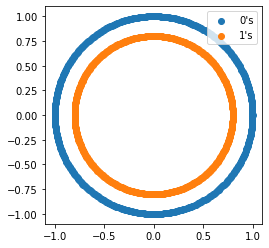

In [65]:
zeros = q1[q1[2] == 0]
ones = q1[q1[2] == 1]

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(zeros[0], zeros[1], label="0's")
ax.scatter(ones[0], ones[1], label="1's")
ax.legend(loc='upper right')
plt.show()

In [66]:
x = np.array(q1[[0,1]])
y = np.array(q1[2])
y = np.reshape(y, (-1, 1))

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [67]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

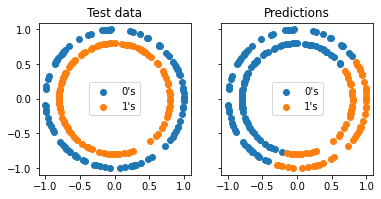

In [68]:
pred_y = model.predict(X_test)
df_t = pd.DataFrame(X_test)
df_t[2] = y_test
df_t[3] = pred_y

real_zeros = df_t[df_t[2] == 0]
pred_zeros = df_t[df_t[3] == 0]

real_ones = df_t[df_t[2] == 1]
pred_ones = df_t[df_t[3] == 1]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.set_title('Test data')
ax1.scatter(real_zeros[0], real_zeros[1], label="0's")
ax1.scatter(real_ones[0], real_ones[1], label="1's")
ax1.legend()
ax1.set(adjustable='box', aspect='equal')

ax2.set_title('Predictions')
ax2.scatter(pred_zeros[0], pred_zeros[1], label="0's")
ax2.scatter(pred_ones[0], pred_ones[1], label="1's")
ax2.legend()
ax2.set(adjustable='box', aspect='equal')

plt.show()